# Estimação Nota do enem
 
Este algoritmo tem como objetivo estimar a nota de matemática do enem, tal objetivo foi dado para participar do curso aceleradev em Data Science da empresa Codinetion.
 
A empresa entregou dois banco de dados, sendo um é denominado train, onde ele serve para treinar o meu modelo de predição. O outro banco de dados que foi dado é o test, que é os dados usado para testar o modelo.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando os dados 

In [2]:
df_train = pd.read_csv('/content/drive/My Drive/testfiles/train.csv') # banco de dados de treinamento
df_test  = pd.read_csv('/content/drive/My Drive/testfiles/test.csv')  # banco de dados de teste

# Olhando se os dois bancos tem o mesmo número de variáveis

In [3]:
print('Diferença entre p núúmero de parâmetros entre os dois banco de dados',df_train.shape[1] - df_test.shape[1]) 

Diferença entre p núúmero de parâmetros entre os dois banco de dados 120


Como o banco de dados de teste é menor do que o de treinamento, o número de parâmetros sera igualados.



In [4]:
target                 = df_train['NU_NOTA_MT']     # retirando os dados de matemática
df_train               = df_train[df_test.columns]   # Agora os dados de treinamento só tem as varáveis de teste
df_train['NU_NOTA_MT'] = target                      # voltando com os dados de target

# Olhando dados faltantes

In [5]:
Procent = (df_train.isnull().sum()/df_train.shape[0])*100 

In [6]:
print('Porcentagem de dados faltantes')
Procent[Procent>0]

Porcentagem de dados faltantes


TP_ENSINO                 68.812819
TP_DEPENDENCIA_ADM_ESC    68.812819
NU_NOTA_CN                24.683176
NU_NOTA_CH                24.683176
NU_NOTA_LC                26.198106
TP_STATUS_REDACAO         26.198106
NU_NOTA_COMP1             26.198106
NU_NOTA_COMP2             26.198106
NU_NOTA_COMP3             26.198106
NU_NOTA_COMP4             26.198106
NU_NOTA_COMP5             26.198106
NU_NOTA_REDACAO           26.198106
Q027                      53.699927
NU_NOTA_MT                26.198106
dtype: float64

Será excluído todas as variáveis faltantes acima de 30%


In [7]:
Ind = (df_train.isnull().sum()/df_train.shape[0])*100 > 30

In [8]:
Ind=Ind.values

In [9]:
col =df_train.columns[Ind]

In [10]:
df_train = df_train.drop(columns = col)
df_test = df_test.drop(columns  = col)

### Como primeiro teste para modelar o modelo, será descartado todas as variáveis que não são do tipo numérica. 
 



In [11]:
Ind        = df_train.dtypes != object
Ind_obj    = df_train.dtypes == object
coluna_obj = df_train.columns[Ind_obj]
coluna_Nu  = df_train.columns[Ind] # colunas onde os dados são do tipo objeto
print('Parâmetros do tipo objeto:' ,coluna_obj)


Parâmetros do tipo objeto: Index(['NU_INSCRICAO', 'SG_UF_RESIDENCIA', 'TP_SEXO', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'Q001', 'Q002', 'Q006',
       'Q024', 'Q025', 'Q026', 'Q047'],
      dtype='object')


A princípio só vou levar em consideração as variáveis numéricas, por causa disso vou criar dois dataflames. Um vai conter apenas parâmetros numéricos o outro terá só objetos

In [12]:
df_train_N   = df_train[coluna_Nu] # dados de treinamento com variáveis numérica
df_train_obj = df_train[coluna_obj] # dados de treinamento com variáveis do tipo objeto

In [13]:
df_test_N = df_test[coluna_Nu[coluna_Nu != 'NU_NOTA_MT']] # dados de teste com variáveis numérica
df_test_obj = df_test[coluna_obj] # dados de teste com variáveis  do tipo objeto


# Olhando variáveis preditoras com baixa variância 

In [14]:
df_dsc = df_train_N.describe()

In [15]:
#np.arange(df_dsc.shape[1])

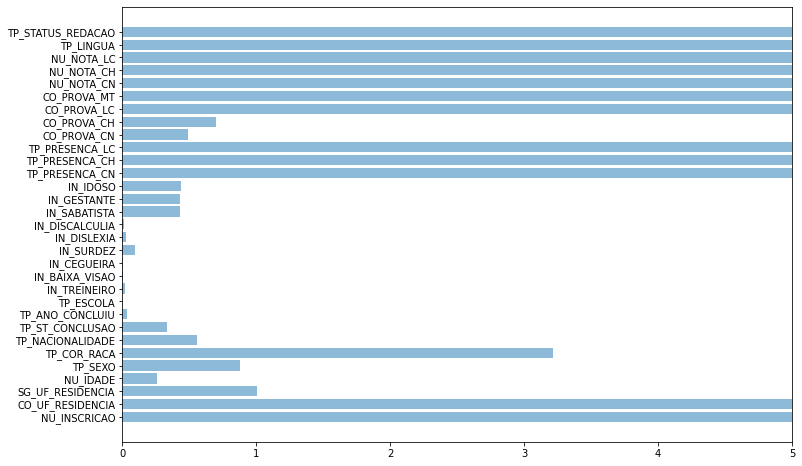

In [16]:
plt.figure(figsize=(12,8))
objects = df_train.columns.values
y_pos = np.arange(df_dsc.shape[1])
performance = df_dsc.values[2]

plt.barh(y_pos, performance, align='center', alpha=0.5)


plt.yticks(y_pos, objects)
#plt.xlabel('STD')
#plt.title('Programming language usage')
plt.xlim(0,5)
plt.show()

Vou olhar as  distribuições das variáveis menor do que std menor do 1


In [17]:
ind = performance < 1
df_ol = df_train[df_dsc.columns[ind]]

TP_NACIONALIDADE


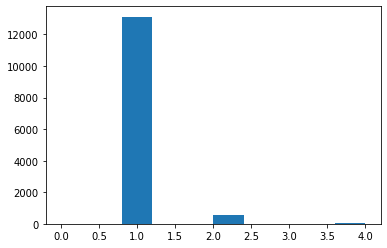

TP_ST_CONCLUSAO


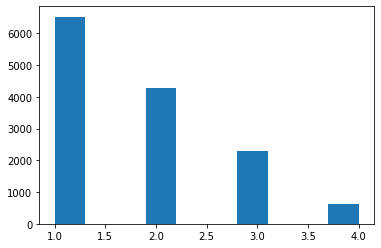

TP_ESCOLA


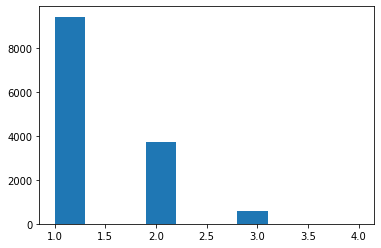

IN_TREINEIRO


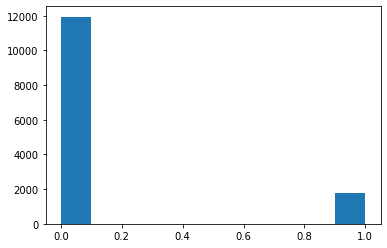

IN_BAIXA_VISAO


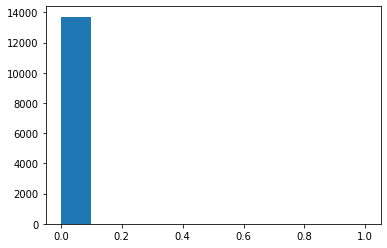

IN_CEGUEIRA


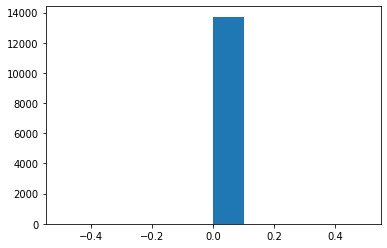

IN_SURDEZ


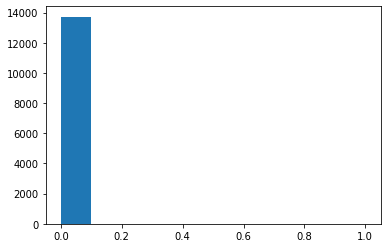

IN_DISLEXIA


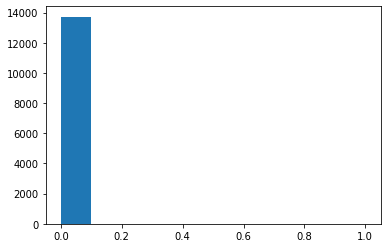

IN_DISCALCULIA


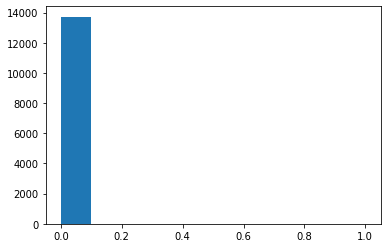

IN_SABATISTA


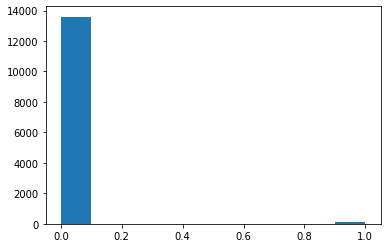

IN_GESTANTE


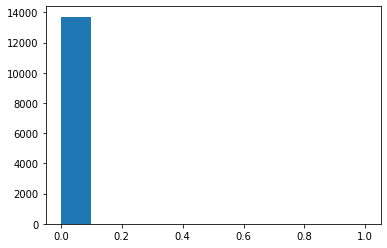

IN_IDOSO


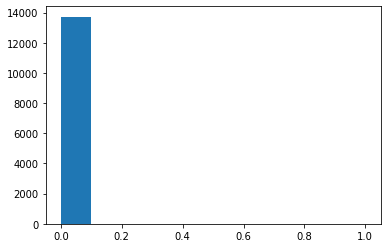

TP_PRESENCA_CN


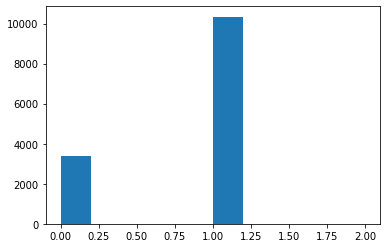

TP_PRESENCA_CH


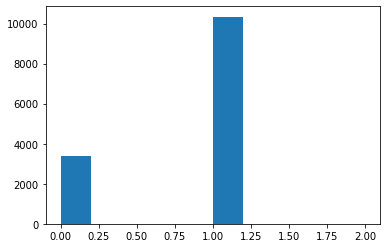

TP_PRESENCA_LC


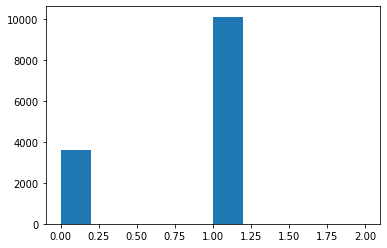

TP_LINGUA


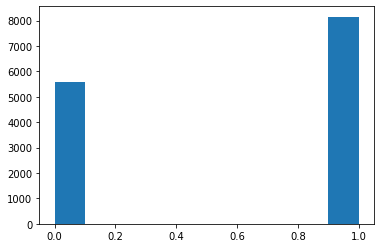

TP_STATUS_REDACAO


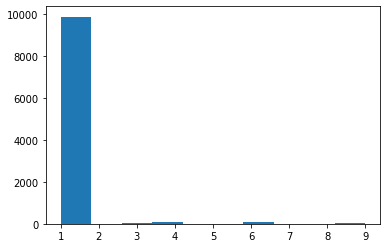

In [18]:
for i in range(df_ol.shape[1]):
    print(df_ol.columns[i])
   #plt.semilogy()
    plt.hist(df_ol[df_ol.columns[i]].dropna())
    plt.show()



* As colunas TP_NACIONALIDADE,IN_TREINEIRO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO, estão com alta concentração de dados em poucas bins, logo o seu uso pode enviesar o meu modelo.
 
* TP_STATUS_REDEÇ O indica o motivo do que a pessoa zerou a prova de redação.
 
* TP_ESCOLA é o tipo da escola. Por exemplo ela pode ser particular, púública  ou no exterior. O seu uso pode enviesar o modelo. A princípio vou descartá las.
 
* TP_ST_CONCLUSAO indica se a pessoa formou ou não. Ela também pode indicar se a pessoa ainda vai forma depois. O seu uso pode enviesar o modelo. A princípio vou descartá la.
 
* As variáveis TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_LINGUA,é sobre a presença dos alunas nas provas que estão presentes como dados faltantes, logo vou descartá las.
 
* TP_LINGUA também será será descartada porque ela se a pessoa fez a prova de inglês ou espanhol


In [20]:
df_train_N=df_train_N.drop(columns = df_dsc.columns[ind])
df_test_N=df_test_N.drop(columns = df_dsc.columns[ind])

In [21]:
#df_train_N = df_train_N[col]
#df_test_N = df_test_N[col]

# Agora vou olhar a relação das minha variáveis preditoras com o meu target e a correlação
 



CO_UF_RESIDENCIA


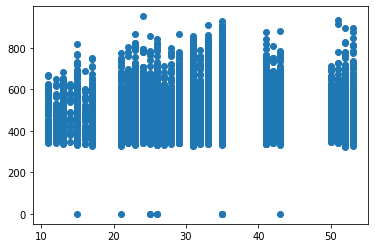

NU_IDADE


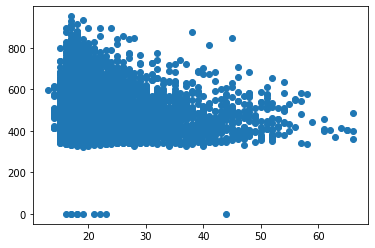

TP_COR_RACA


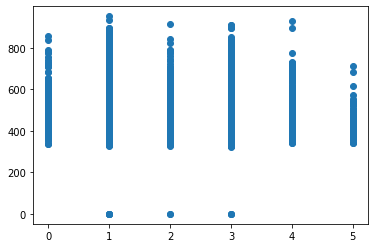

TP_ANO_CONCLUIU


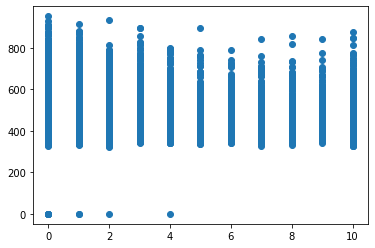

NU_NOTA_CN


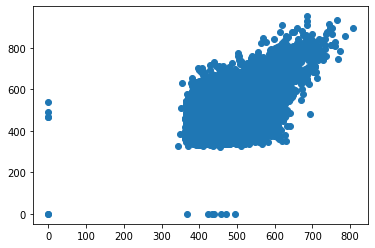

NU_NOTA_CH


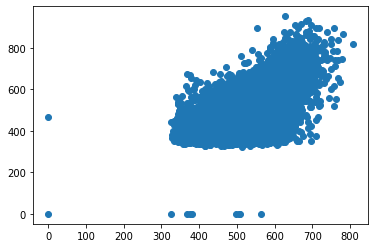

NU_NOTA_LC


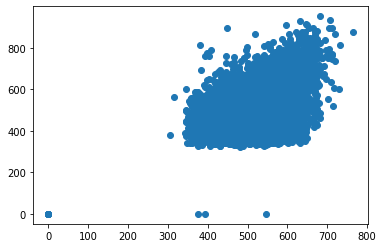

NU_NOTA_COMP1


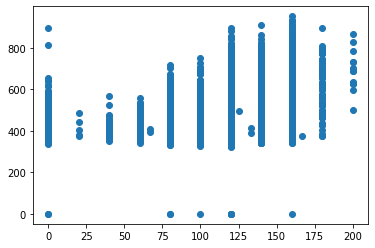

NU_NOTA_COMP2


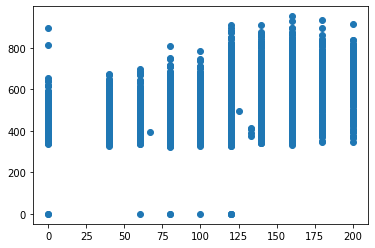

NU_NOTA_COMP3


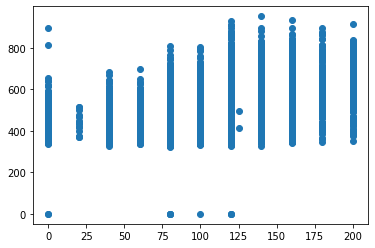

NU_NOTA_COMP4


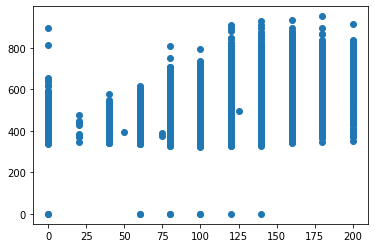

NU_NOTA_COMP5


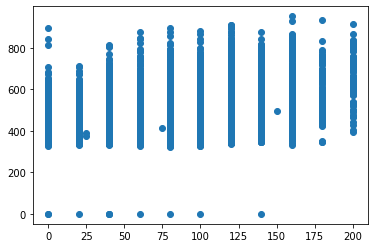

NU_NOTA_REDACAO


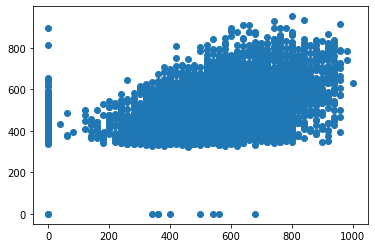

NU_NOTA_MT


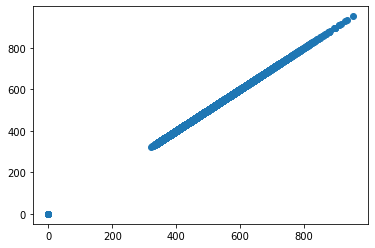

In [22]:
for i in range(len(df_train_N.columns)):
  print(df_train_N.columns[i])
  plt.plot(df_train_N[df_train_N.columns[i]],target,'o')
  plt.show()

 

In [23]:
df_cor=df_train_N.corr()

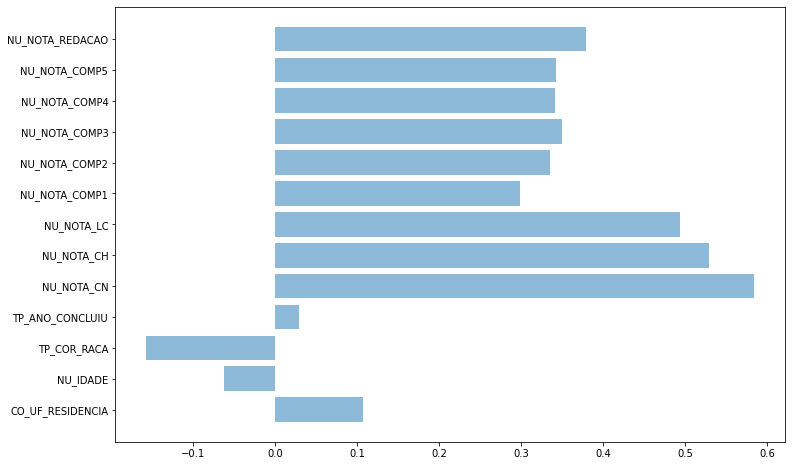

In [24]:
plt.figure(figsize=(12,8))
objects = df_cor.columns.values[:-1]
y_pos = np.arange(df_cor.shape[1]-1)
performance = df_cor.NU_NOTA_MT.values[:-1]

plt.barh(y_pos, performance, align='center', alpha=0.5)


plt.yticks(y_pos, objects)
#plt.xlabel('STD')
#plt.title('Programming language usage')
#plt.xlim(0,0.6)
plt.show()

* As variáveis que estão acima de 0.3 são as notas dos candidatos em alguma prova. E como as que estão abaixo são variáveis que indicam algum tipo de status. Logo vou levar em consideração só as variáveis que indicam as notas dos alunos, pois uma boa hipótese de que se o aluno foi bem em alguma prova ele vai tirar uma boa nota de matemática.  
 


In [25]:
col = ['CO_UF_RESIDENCIA' ,'TP_COR_RACA','TP_ANO_CONCLUIU','NU_IDADE']

df_train_N=df_train_N.drop(columns = col)
df_test_N=df_test_N.drop(columns = col)

olhando de novo se tem dados faltantes

In [26]:
Procent1 = (df_train_N.isnull().sum()/df_train_N.shape[0])*100 
Procent2 = (df_test_N.isnull().sum()/df_test_N.shape[0])*100 

In [27]:

print(Procent1)

NU_NOTA_CN         24.683176
NU_NOTA_CH         24.683176
NU_NOTA_LC         26.198106
NU_NOTA_COMP1      26.198106
NU_NOTA_COMP2      26.198106
NU_NOTA_COMP3      26.198106
NU_NOTA_COMP4      26.198106
NU_NOTA_COMP5      26.198106
NU_NOTA_REDACAO    26.198106
NU_NOTA_MT         26.198106
dtype: float64


In [28]:
print(Procent2)

NU_NOTA_CN         24.781469
NU_NOTA_CH         24.781469
NU_NOTA_LC         26.201923
NU_NOTA_COMP1      26.201923
NU_NOTA_COMP2      26.201923
NU_NOTA_COMP3      26.201923
NU_NOTA_COMP4      26.201923
NU_NOTA_COMP5      26.201923
NU_NOTA_REDACAO    26.201923
dtype: float64


sobre os dados faltantes vou considerar eles como 0.

In [ ]:
#ind=df_cor.columns[np.argsort(df_cor.NU_NOTA_MT.values)][:4]

In [29]:
df_train_N = df_train_N.fillna(0) 
df_test_N = df_test_N.fillna(0)




In [30]:
#df_test_N

In [ ]:
#df_train = df_train.drop(columns = ind)
#df_test  = df_test.drop(columns = ind)

# Separando os dados em treinamento e teste

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor


In [32]:
X_train, X_target, y_train, y_target = train_test_split(df_train_N[df_train_N.columns[0:-1]], np.ravel(df_train_N['NU_NOTA_MT']), test_size=0.30, random_state=101)

# Avaliação 1

In [105]:
def modelo_linear(X_train, X_target, y_train, y_target):
  reg = linear_model.LinearRegression()
  reg=reg.fit(X_train, y_train)
  y_pred = reg.predict(X_target)
  reg_s = reg.score(X_target,y_target)
  print('Score Regressão Linear',reg_s)
  return y_pred, reg_s


def modelo_fl(X_train, X_target, y_train, y_target,plot):
  arvores = np.arange(100,500,100)
  features = np.arange(1,X_train.shape[1]+1)
  sample_leaf = np.arange(1,12,2)
  suport_score = np.zeros((len(sample_leaf),len(features),len(arvores)))
  suport_mse   = np.zeros((len(sample_leaf),len(features),len(arvores)))

  for k in range(len(sample_leaf)):
    for j in range(len(features)):
      for i in range(len(arvores)):
        regressor             = RandomForestRegressor(n_estimators= arvores[i],max_features = features[j],min_samples_leaf=sample_leaf[k])
        reg_Rf                = regressor.fit(X_train, y_train)
        y_pred1               = reg_Rf.predict(X_target)
        suport_score[k,j,i]   = reg_Rf.score(X_target,y_target)

  if plot == 1:
    plt.figure(figsize=(12,8))
    for j in rannge(len(features)):
      plt.subplot(2,3,j + 1)
      for i in range(len(df_test_N.columns)):
        plt.plot(arvores,suport_score[i], label = str(i +1))
      plt.legend()
      plt.xlabel('Número de arvores')
      plt.ylabel('Score')

  valores = []
  for i in range(suport_score.shape[0]):
    valores.append(np.max(np.max(suport_score[i], axis = 1)))

  print('Score Floresta aleatória',max(np.array(valores)))

  return suport_score
    

In [106]:
y_pred, reg_s = modelo_linear(X_train, X_target, y_train, y_target)
suport_score  = modelo_fl(X_train, X_target, y_train, y_target,0)



Score Regressão Linear 0.9061321211714221
Score Floresta aleatória 0.9242027070389146


# Avaliação *2*
 
- Ao somar os valores da  NU_NOTA_COMP1, NU_NOTA_COMP2,NU_NOTA_COMP3, NU_NOTA_COMP4 da o valores de NU_NOTA_REDACAO, já que o somatório destas colunas tem que dá o valor de NU_NOTA_REDAÇ O.
 
Logo, talvez a ausência destas informações não causa impacto nos valores da nota.
 



In [107]:
df_train_N1= df_train_N.drop(columns=['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4'])
df_test_N1= df_test_N.drop(columns=['NU_NOTA_COMP1','NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4'])

In [108]:
X_train, X_target, y_train, y_target = train_test_split(df_train_N1[df_train_N1.columns[0:-1]], np.ravel(df_train_N1['NU_NOTA_MT']), test_size=0.30, random_state=101)

In [109]:
y_pred, reg_s = modelo_linear(X_train, X_target, y_train, y_target)
suport_score  = modelo_fl(X_train, X_target, y_train, y_target,0)

Score Regressão Linear 0.9061321211714221
Score Floresta aleatória 0.9244240876223009


In [110]:
ind1 = []
ind2 = []
valores = []
for i in range(suport_score.shape[0]):
  ind1.append(np.argmax(suport_score[i],axis = 1))
  ind2.append(np.argmax(np.max(suport_score[i],axis = 1)))
  valores.append(np.max(np.max(suport_score[i], axis = 1)))


In [112]:
print('melhor features',np.arange(1,X_train.shape[1]+1)[ind2[np.argmax(valores)]])
print('melhor sample_leaf', np.arange(1,12,2)[np.argmax(valores)])
print('melhor arvore' ,np.arange(100,500,100)[ind1[np.argmax(valores)][ind2[np.argmax(valores)]]])

melhor features 2
melhor sample_leaf 11
melhor arvore 200


# Treinando os dados de teste

In [94]:
regressor             = RandomForestRegressor(n_estimators= 200,max_features = 3,min_samples_leaf=11)
reg_Rf                = regressor.fit(X_train, y_train)
y_pred1               = reg_Rf.predict(df_test_N1)




Pegando as matriculas

In [95]:
df_test  = pd.read_csv('/content/drive/My Drive/testfiles/test.csv')  # banco de dados de teste

In [100]:
Matricula= df_test[df_test.columns[0]]

# Salvando os arquivos

In [101]:
df = pd.DataFrame()

In [102]:
df['NU_INSCRICAO'] = Matricula

In [103]:
df['NU_NOTA_MT'] = y_pred1

In [104]:
df.to_csv('/content/drive/My Drive/testfiles/answer.csv',index=False)

# Este resultado atingiu um total de 92.2 procento de acerto